<a href="https://colab.research.google.com/github/mohammed21kamall/Graduation-Project/blob/main/K_Means_Clusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


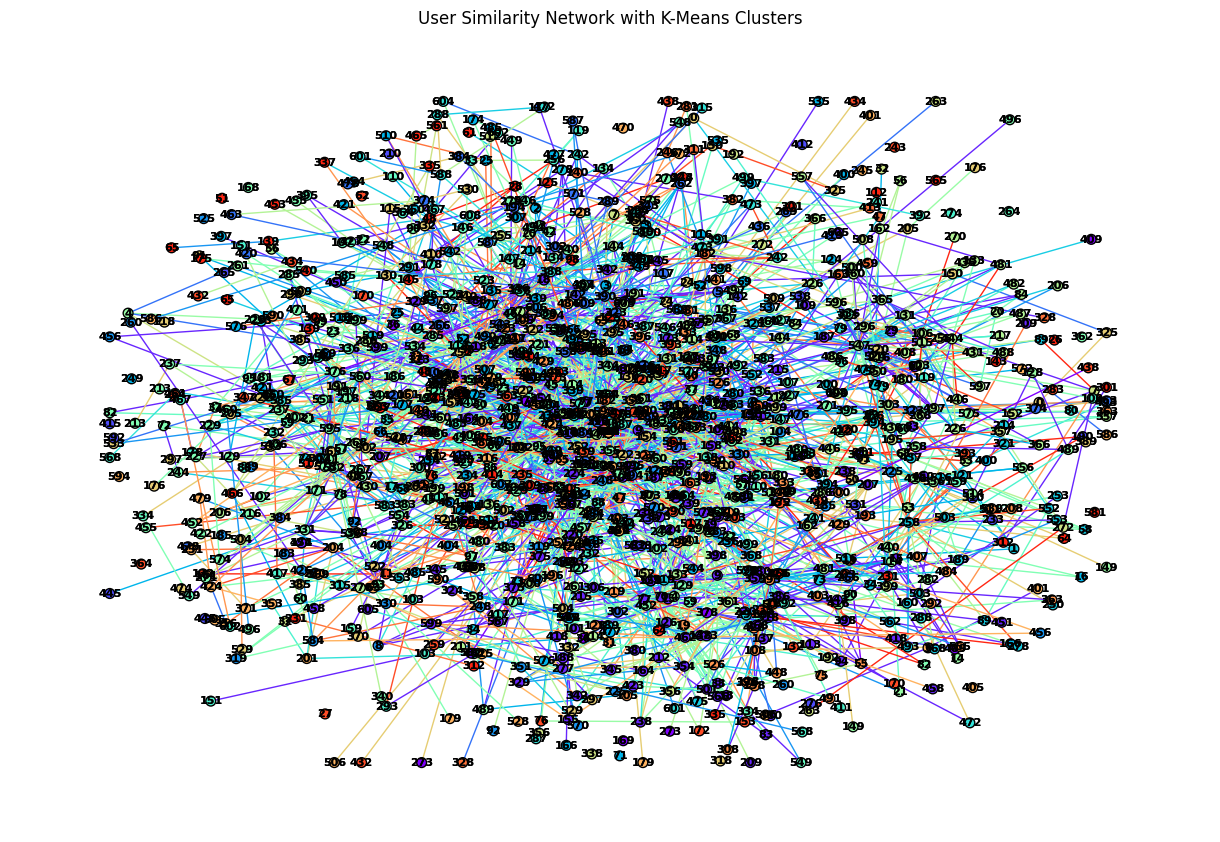

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# بيانات المستخدمين والتشابه
num_users = 610
users = np.arange(num_users)
similarity_matrix = np.random.rand(num_users, num_users)

# تحديد عدد الجيران (k)
k = 20


# نمذجة KNN
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')
knn_model.fit(similarity_matrix)

# الحصول على الجيران الأقرب لكل مستخدم
distances, indices = knn_model.kneighbors(similarity_matrix)

# تحديد عدد المجموعات باستخدام K-Means
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
user_clusters = kmeans.fit_predict(similarity_matrix)

# إعداد الألوان المستخدمة للعقد والحواف
node_colors = plt.cm.rainbow(user_clusters.astype(float) / num_clusters)
edge_colors = [node_colors[i] for i in range(num_users) for j in indices[i] if i != j and user_clusters[i] == user_clusters[j]]

# رسم الشبكة
G = nx.Graph()

# إضافة العقد (المستخدمين)
for user, color in zip(users, node_colors):
    G.add_node(user, color=color)

# إضافة الروابط بين المستخدمين وفقًا للجيران في نفس المجموعة
for i in range(num_users):
    for j in indices[i]:
        if i != j and user_clusters[i] == user_clusters[j]:
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# حساب مواقع العقد باستخدام "spring_layout" لتجنب التداخل
pos = nx.spring_layout(G, k=0.2)

# الحصول على مجتمعات الشبكة
communities = list(nx.connected_components(G))

# رسم الشبكة بتحديد ألوان مختلفة لكل مجتمع وتجميع المجتمعات في أماكن مختلفة
plt.figure(figsize=(12, 8))
for idx, community in enumerate(communities):
    community_graph = G.subgraph(community)
    community_pos = nx.spring_layout(community_graph, k=0.2)
    nx.draw(community_graph, community_pos, with_labels=True, node_color=node_colors[list(community)], font_weight='bold', font_size=8, node_size=50, edge_color=edge_colors, edgecolors='k')
    nx.draw_networkx_labels(community_graph, community_pos, font_size=8, font_color='black', font_weight='bold')

# إضافة روابط بين المجتمعات
for i in range(num_clusters - 1):
    G.add_edge(i, i + 1, weight=0)  # يمكنك تعديل الوزن حسب الحاجة

# حساب مواقع العقد بعد إضافة الروابط بين المجتمعات
pos = nx.spring_layout(G, k=0.2)

# رسم الشبكة بتحديد ألوان مختلفة لكل مجتمع وتجميع المجتمعات في أماكن مختلفة
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold', font_size=8, node_size=50, edge_color=edge_colors, edgecolors='k')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

plt.title("User Similarity Network with K-Means Clusters")
plt.show()


In [ ]:
# Nearest neighbors for a given k from users with distances
k_nearest_users = {}
k_neighbors_count = k  # You can change this value to the desired one

print(f"Nearest {k_neighbors_count} users for each user:")
for i in range(num_users):
    k_nearest_users[i] = {"neighbors": indices[i][1:k_neighbors_count + 1], "distances": distances[i][1:k_neighbors_count + 1]}

for i in range(num_users):
    current_user = i
    neighbors_count = len(k_nearest_users[current_user]["neighbors"])
    same_neighbors_count = sum(
        1 for user in k_nearest_users.values() if current_user in user["neighbors"]
    )

    print(f"User {current_user}:")
    for neighbor, distance in zip(k_nearest_users[current_user]["neighbors"], k_nearest_users[current_user]["distances"]):
        print(f"   User {neighbor} at distance {distance:.2f}")
    print(f"   {same_neighbors_count} users share the same neighbors.")
    print()


Nearest 3 users for each user:
User 0:
   User 11 at distance 0.09
   User 10 at distance 0.11
   3 users share the same neighbors.

User 1:
   User 2 at distance 0.14
   User 19 at distance 0.15
   2 users share the same neighbors.

User 2:
   User 19 at distance 0.07
   User 1 at distance 0.14
   5 users share the same neighbors.

User 3:
   User 16 at distance 0.09
   User 13 at distance 0.09
   4 users share the same neighbors.

User 4:
   User 13 at distance 0.12
   User 6 at distance 0.13
   0 users share the same neighbors.

User 5:
   User 18 at distance 0.09
   User 14 at distance 0.11
   5 users share the same neighbors.

User 6:
   User 3 at distance 0.09
   User 16 at distance 0.09
   3 users share the same neighbors.

User 7:
   User 5 at distance 0.12
   User 12 at distance 0.15
   0 users share the same neighbors.

User 8:
   User 2 at distance 0.17
   User 5 at distance 0.19
   0 users share the same neighbors.

User 9:
   User 3 at distance 0.12
   User 13 at distance 

In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# إعداد بيانات صغيرة للتوضيح
np.random.seed(42)
data = {
    'User_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Action': np.random.rand(10),
    'Comedy': np.random.rand(10),
    'Drama': np.random.rand(10),
}

# تحويل البيانات إلى DataFrame
User_Behavior_Probability = pd.DataFrame(data)
User_Behavior_Probability = User_Behavior_Probability.set_index('User_ID')

# استخدام K-Means Clustering
num_clusters = 3

# استخدام K-Means مع عدد الكتل المحدد
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(User_Behavior_Probability)

# إضافة عمود لتسمية الكتل إلى DataFrame النهائي
User_Behavior_Probability['Cluster'] = kmeans.labels_

# طباعة DataFrame النتائج مع تسميات الكتل
User_Behavior_Probability.head(10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Action,Comedy,Drama,Cluster
User_ID,,,,
1,0.374540,0.020584,0.611853,1
2,0.950714,0.969910,0.139494,0
3,0.731994,0.832443,0.292145,0
4,0.598658,0.212339,0.366362,2
5,0.156019,0.181825,0.456070,1
6,0.155995,0.183405,0.785176,1
7,0.058084,0.304242,0.199674,1
8,0.866176,0.524756,0.514234,2
9,0.601115,0.431945,0.592415,2


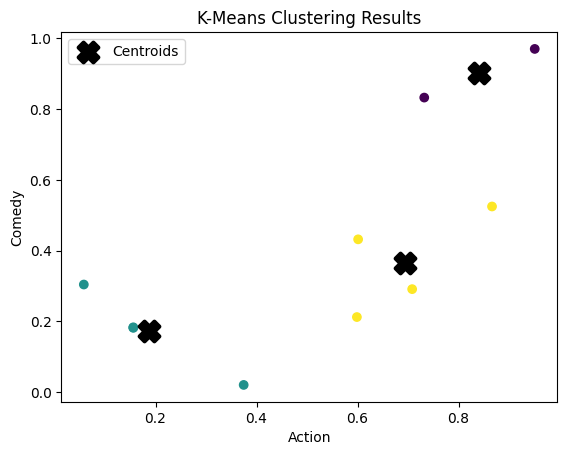

In [33]:
import matplotlib.pyplot as plt

# الأبعاد المستخدمة للرسم البياني
dimension1 = 'Action'
dimension2 = 'Comedy'

# الألوان المستخدمة لتمثيل الكتل
colors = ['red', 'blue', 'green']

# رسم البيانات
plt.scatter(User_Behavior_Probability[dimension1], User_Behavior_Probability[dimension2], c=User_Behavior_Probability['Cluster'], cmap='viridis')

# إعداد العنوان والتسميات
plt.title('K-Means Clustering Results')
plt.xlabel(dimension1)
plt.ylabel(dimension2)

# رسم الدائرات المركزية للكتل
centers = kmeans.cluster_centers_
plt.scatter(centers[:, User_Behavior_Probability.columns.get_loc(dimension1)], centers[:, User_Behavior_Probability.columns.get_loc(dimension2)], marker='X', s=200, linewidths=3, color='black', label='Centroids')

# إظهار الرسم البياني
plt.legend()
plt.show()


In [36]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# إعداد بيانات صغيرة للتوضيح (قمت بتعديلها لتناسب 610 مستخدم و 20 نوعًا من الأفلام)
np.random.seed(42)
num_users = 610
num_movie_genres = 20

data = {
    'User_ID': range(1, num_users + 1),
}

for genre in range(1, num_movie_genres + 1):
    data[f'Genre_{genre}'] = np.random.rand(num_users)

# تحويل البيانات إلى DataFrame
User_Behavior_Probability = pd.DataFrame(data)
User_Behavior_Probability = User_Behavior_Probability.set_index('User_ID')

# استخدام K-Means Clustering
num_clusters = 3

# استخدام K-Means مع عدد الكتل المحدد
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(User_Behavior_Probability)

# إضافة عمود لتسمية الكتل إلى DataFrame النهائي
User_Behavior_Probability['Cluster'] = kmeans.labels_

# طباعة DataFrame النتائج مع تسميات الكتل
User_Behavior_Probability.head()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,...,Genre_12,Genre_13,Genre_14,Genre_15,Genre_16,Genre_17,Genre_18,Genre_19,Genre_20,Cluster
User_ID,,,,,,,,,,,,,,,,,,,,,
1,0.374540,0.039312,0.950864,0.979970,0.553711,0.205333,0.509854,0.648765,0.204088,0.156362,...,0.098547,0.246000,0.821801,0.585852,0.543470,0.925265,0.365025,0.692613,0.472804,1
2,0.950714,0.799410,0.151058,0.601882,0.541705,0.483040,0.501276,0.954566,0.469041,0.751798,...,0.232079,0.532087,0.769251,0.674192,0.497154,0.146897,0.904474,0.592190,0.899760,2
3,0.731994,0.627900,0.432335,0.582423,0.761902,0.268534,0.050243,0.151432,0.800939,0.568269,...,0.708900,0.482356,0.596723,0.804261,0.134786,0.970854,0.503228,0.878698,0.336160,2
4,0.598658,0.081759,0.943616,0.748073,0.833650,0.287462,0.034912,0.477416,0.180159,0.274666,...,0.823744,0.702866,0.337202,0.659156,0.496075,0.947477,0.464784,0.356889,0.294322,0
5,0.156019,0.873579,0.419727,0.811770,0.440441,0.656756,0.551160,0.601807,0.109863,0.474435,...,0.857029,0.068010,0.262509,0.398055,0.169104,0.884572,0.997514,0.299886,0.872796,2


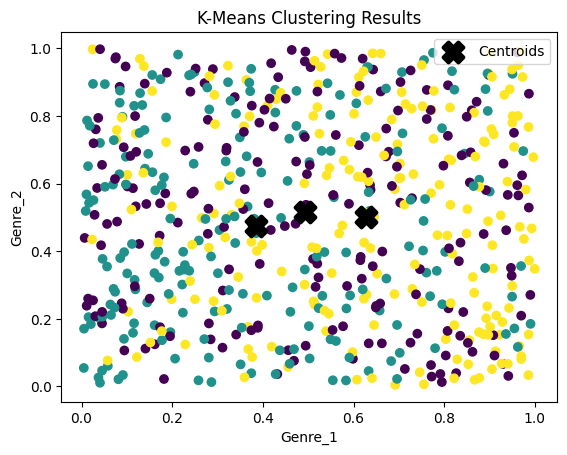

In [37]:
# الأبعاد المستخدمة للرسم البياني
dimensions = [f'Genre_{i}' for i in range(1, num_movie_genres + 1)]

# الألوان المستخدمة لتمثيل الكتل
colors = ['red', 'blue', 'green']

# رسم البيانات
plt.scatter(User_Behavior_Probability[dimensions[0]], User_Behavior_Probability[dimensions[1]], c=User_Behavior_Probability['Cluster'], cmap='viridis')

# إعداد العنوان والتسميات
plt.title('K-Means Clustering Results')
plt.xlabel(dimensions[0])
plt.ylabel(dimensions[1])

# رسم الدائرات المركزية للكتل
centers = kmeans.cluster_centers_
plt.scatter(centers[:, User_Behavior_Probability.columns.get_loc(dimensions[0])], centers[:, User_Behavior_Probability.columns.get_loc(dimensions[1])], marker='X', s=200, linewidths=3, color='black', label='Centroids')

# إظهار الرسم البياني
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


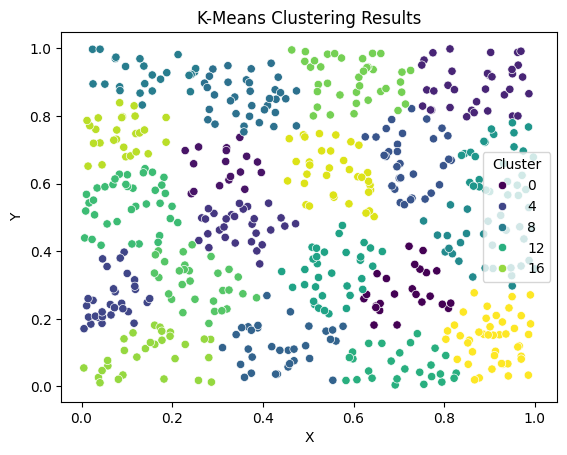

In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# إعداد بيانات صغيرة للتوضيح (قمت بتعديلها لتناسب 610 مستخدم و 20 نوعًا من الأفلام)
np.random.seed(42)
num_users = 610
num_movie_genres = 2

data = {
    'User_ID': range(1, num_users + 1),
}

for genre in range(1, num_movie_genres + 1):
    data[f'Genre_{genre}'] = np.random.rand(num_users)

# تحويل البيانات إلى DataFrame
User_Behavior_Probability = pd.DataFrame(data)
User_Behavior_Probability = User_Behavior_Probability.set_index('User_ID')

# استخدام K-Means Clustering
num_clusters = 20

# استخدام K-Means مع عدد الكتل المحدد
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(User_Behavior_Probability)

# إضافة عمود لتسمية الكتل إلى DataFrame النهائي
User_Behavior_Probability['Cluster'] = kmeans.labels_

# الأبعاد المستخدمة للرسم البياني
dimensions = [f'Genre_{i}' for i in range(1, num_movie_genres + 1)]

# تحديد الألوان لكل نوع من الأفلام
palette = sns.color_palette("viridis", as_cmap=True)

# رسم البيانات باستخدام seaborn
sns.scatterplot(data=User_Behavior_Probability, x=dimensions[0], y=dimensions[1], hue='Cluster', palette=palette)

# إعداد العنوان والتسميات
plt.title('K-Means Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')

# إظهار الرسم البياني
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


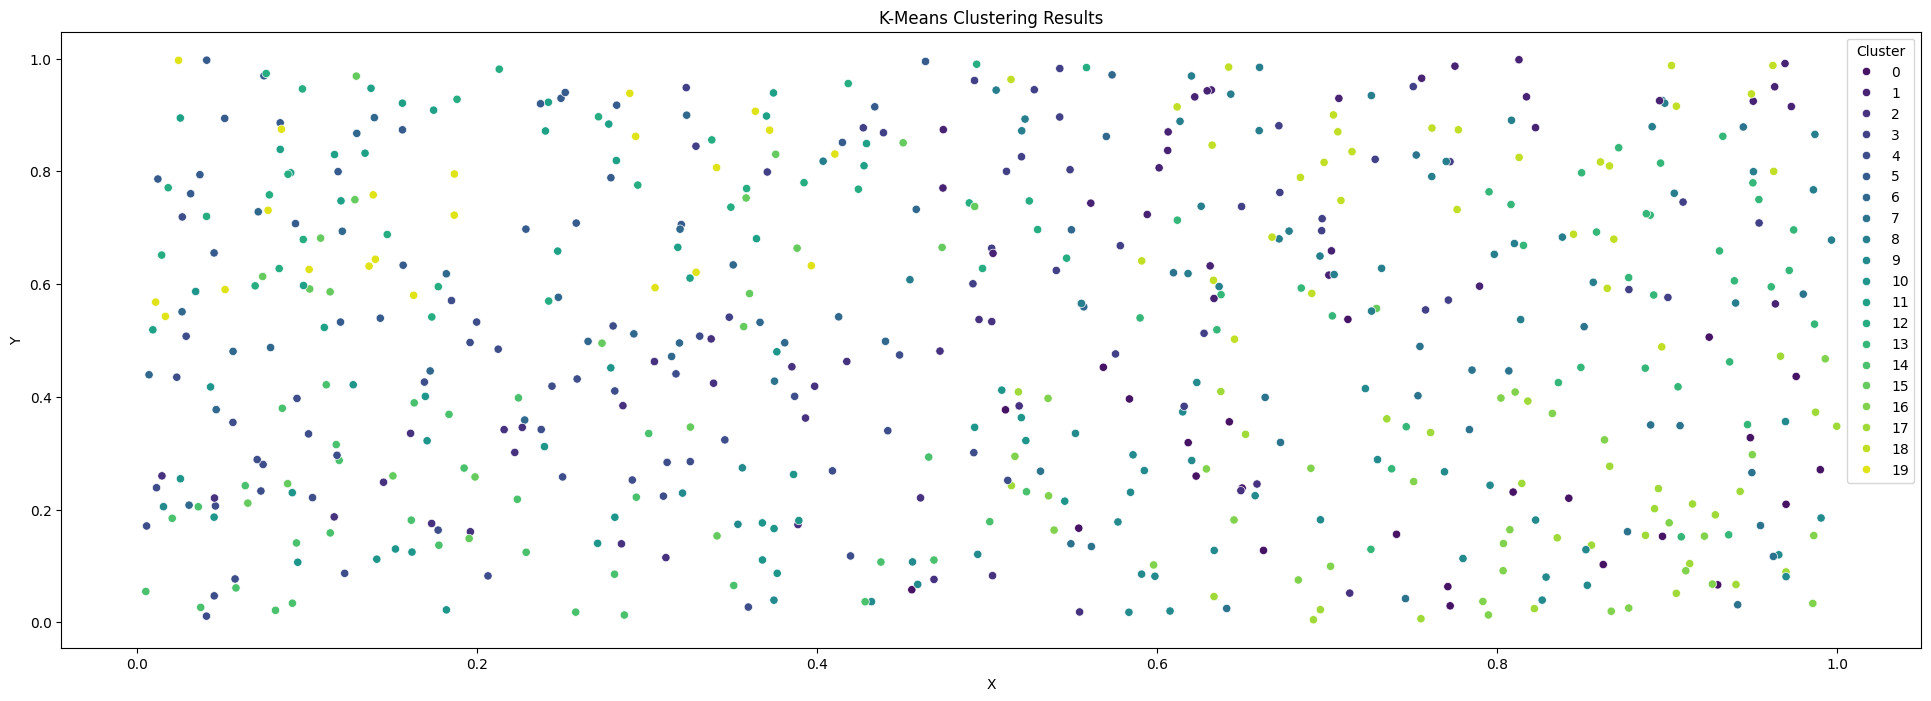

In [89]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# إعداد بيانات صغيرة للتوضيح (قمت بتعديلها لتناسب 610 مستخدم)
np.random.seed(42)
num_users = 610

data = {
    'User_ID': range(1, num_users + 1),
}

# إضافة أبعاد السلوك لكل مستخدم بشكل عشوائي
num_dimensions = 5  # عدد الأبعاد المرغوب فيه
for dimension in range(1, num_dimensions + 1):
    data[f'Dimension_{dimension}'] = np.random.rand(num_users)

# تحويل البيانات إلى DataFrame
User_Behavior_Probability = pd.DataFrame(data)
User_Behavior_Probability = User_Behavior_Probability.set_index('User_ID')

# تحديد قيمة k المحددة
k = 20

# استخدام K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(User_Behavior_Probability)

# إضافة عمود لتسمية الكتل إلى DataFrame النهائي
User_Behavior_Probability['Cluster'] = kmeans.labels_

# الأبعاد المستخدمة للرسم البياني
dimensions = [f'Dimension_{i}' for i in range(1, num_dimensions + 1)]

# تحديد الألوان لكل نوع من الأفلام
colors = sns.color_palette("viridis", n_colors=k)

# تحديد حجم الشكل
plt.figure(figsize=(24, 8))

# رسم البيانات باستخدام seaborn
sns.scatterplot(data=User_Behavior_Probability, x=dimensions[0], y=dimensions[1], hue='Cluster', palette=colors, legend='full')

# إعداد العنوان والتسميات
plt.title('K-Means Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')

# إظهار الرسم البياني
plt.show()


In [104]:
import random

def generate_random_similarity_data(num_users):
    similarity_data = []

    for i in range(num_users):
        for j in range(i + 1, num_users):
            similarity = round(random.uniform(0.5, 1.0), 2)
            similarity_data.append((i + 1, j + 1, similarity))

    return similarity_data

def model_complex_network(U, S, k, p):
    Er = []  # Initialize empty list for remained links

    for u in U:
        Su = [suv for suv in S if u in suv]  # Get all similarity results related to user u

        for j in range(p):
            if Su:
                max_suv = max(Su, key=lambda x: x[2])  # Assuming similarity values are at index 2
                v = max_suv[1]
                Er.append((u, v, max_suv[2]))  # Add link with similarity as the weight
                Su.remove(max_suv)
                S.remove(max_suv)
                j += 1

    for j in range(k * len(U) - p * len(U)):
        if S:
            max_suv = max(S, key=lambda x: x[2])
            u, v, weight = max_suv
            Er.append((u, v, weight))  # Add link with similarity as the weight
            S.remove(max_suv)
            j += 1

    N = U  # Nodes remain the same

    return N, Er

# Example usage with 100 users
num_users = 20
U = list(range(1, num_users + 1))  # Generate a list of 100 users
S = generate_random_similarity_data(num_users)
k = 5
p = 3

network_nodes, network_links = model_complex_network(U, S, k, p)
print("Nodes:", network_nodes)
print("Links:", network_links)


Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Links: [(1, 9, 0.99), (1, 12, 0.98), (1, 13, 0.96), (2, 20, 0.96), (2, 17, 0.95), (2, 10, 0.92), (3, 8, 0.94), (3, 19, 0.86), (3, 4, 0.84), (4, 8, 0.99), (4, 11, 0.98), (4, 18, 0.96), (5, 7, 0.98), (5, 14, 0.95), (5, 8, 0.94), (6, 18, 0.94), (6, 12, 0.87), (6, 6, 0.86), (7, 10, 0.94), (7, 19, 0.9), (7, 13, 0.89), (8, 14, 0.98), (8, 16, 0.93), (8, 18, 0.91), (9, 11, 0.97), (9, 9, 0.92), (9, 18, 0.9), (10, 16, 0.95), (10, 10, 0.88), (10, 19, 0.86), (11, 15, 0.98), (11, 18, 0.92), (11, 12, 0.88), (12, 16, 0.98), (12, 12, 0.84), (12, 19, 0.84), (13, 13, 0.93), (13, 13, 0.84), (13, 13, 0.83), (14, 14, 0.87), (14, 14, 0.84), (14, 14, 0.78), (15, 19, 0.95), (15, 16, 0.93), (15, 17, 0.93), (16, 16, 0.92), (16, 16, 0.84), (16, 16, 0.79), (17, 17, 0.89), (17, 17, 0.88), (17, 17, 0.86), (18, 18, 0.87), (18, 18, 0.81), (18, 18, 0.81), (19, 19, 0.76), (19, 19, 0.75), (19, 19, 0.73), (20, 20, 0.86), (20, 20, 0.83), (20, 2

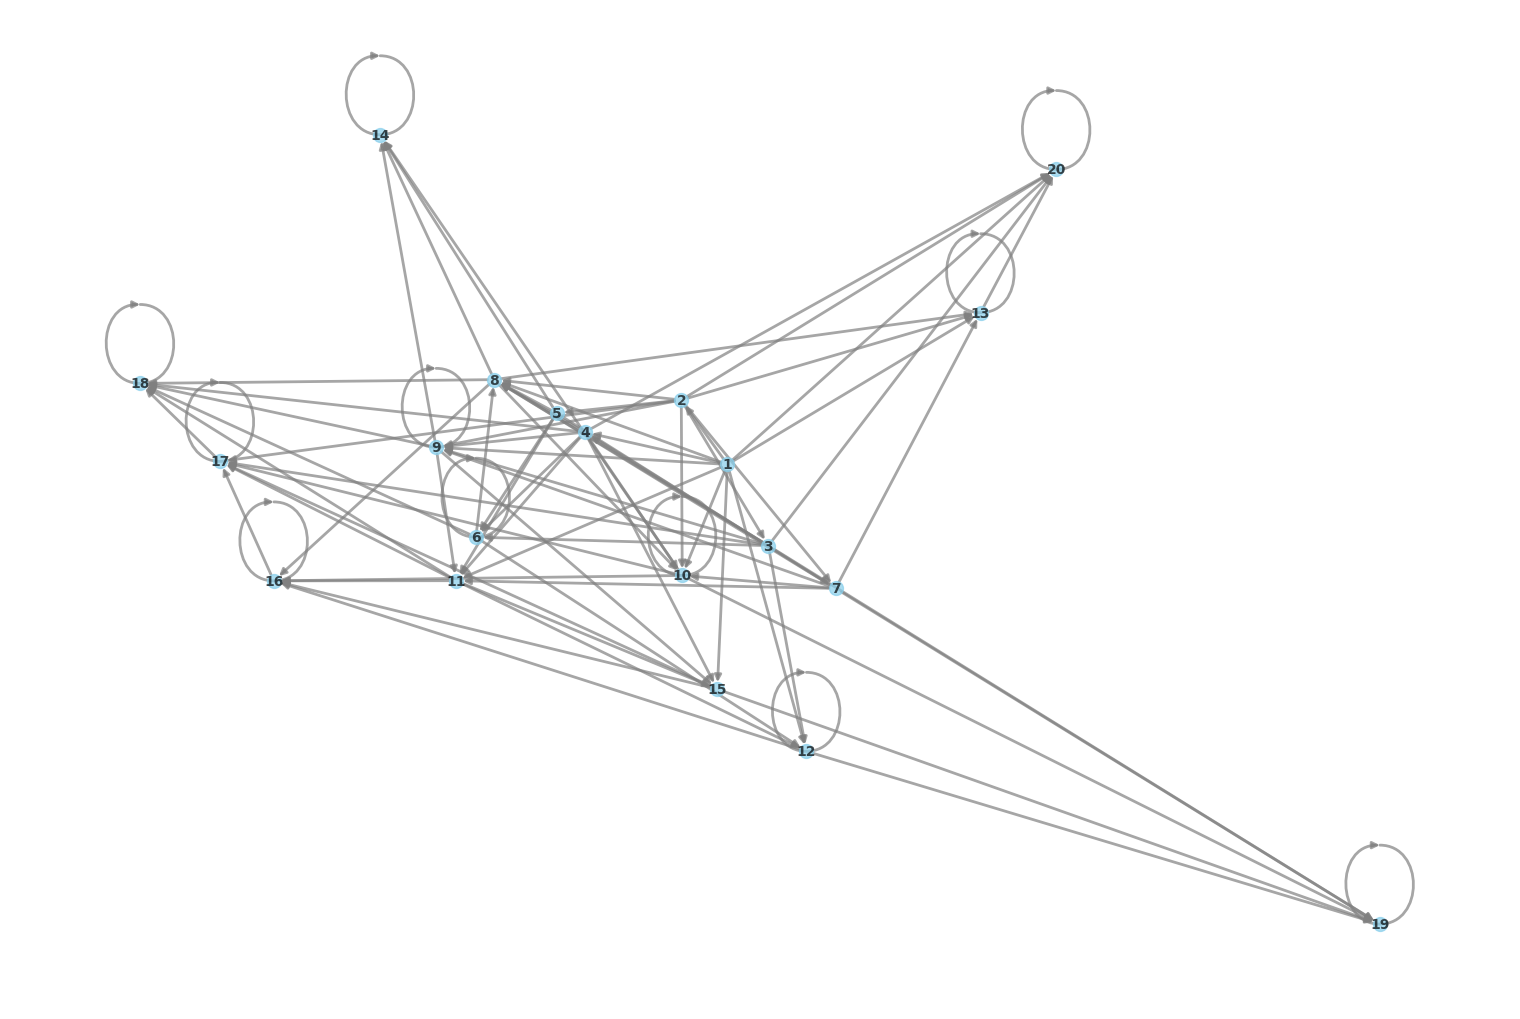

In [108]:

import networkx as nx
import matplotlib.pyplot as plt

# Creating a directed graph using networkx
G = nx.DiGraph()

# Adding nodes
G.add_nodes_from(network_nodes)

# Adding weighted edges
G.add_weighted_edges_from(network_links)

# Setting a larger figure size
plt.figure(figsize=(15, 10))

# Drawing the graph
pos = nx.spring_layout(G)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, node_size=100, font_size=10, font_color='black', font_weight='bold', node_color='skyblue', edge_color='gray', width=2, alpha=0.7, arrowsize=10)

# Display the plot
plt.show()
